# Data analysis of Cleaned Met Crime Dataset

### Group 7
#### Author: Trupti Kolvekar

#### 1. Import libraries needed for the notebook

In [1]:
# Import the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Load the dataset and view the top 5 rows

In [2]:
#  Load the crime dataset .csv file
crime_df = pd.read_csv('data/csv/airbnb_datasets/airbnbfiles_final_cleansed/cleansed_detailed_listings_FINAL.csv', header=0, sep=',')

# Print the DataFrame
print(crime_df.head(5))

  Crime ID    Month  Longitude   Latitude             Crime type  \
0      NaN  2022-06   0.137065  51.583672  Anti-social behaviour   
1      NaN  2022-06   0.140192  51.582311  Anti-social behaviour   
2      NaN  2022-06   0.137065  51.583672  Anti-social behaviour   
3      NaN  2022-06   0.137065  51.583672  Anti-social behaviour   
4      NaN  2022-06   0.140192  51.582311  Anti-social behaviour   

  Last outcome category matched_neighbourhood  
0                   NaN  Barking and Dagenham  
1                   NaN  Barking and Dagenham  
2                   NaN  Barking and Dagenham  
3                   NaN  Barking and Dagenham  
4                   NaN  Barking and Dagenham  


#### 3. Make sure the data in the DataFrame is lowercase and whitespace has been replaced with underscores "_"

In [3]:
# Convert headers to lowercase and replace whitespace with underscores
crime_df.columns = crime_df.columns.str.lower().str.replace(' ', '_')

# Convert columns to string type
crime_df = crime_df.astype(str) #this only works on string type so needs to be converted

# Convert row values to lowercase and replace whitespace with underscores
crime_df = crime_df.apply(lambda x: x.str.lower().str.replace(' ', '_'))

# check
print(crime_df.head(5))

  crime_id    month            longitude   latitude             crime_type  \
0      nan  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
1      nan  2022-06             0.140192  51.582311  anti-social_behaviour   
2      nan  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
3      nan  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
4      nan  2022-06             0.140192  51.582311  anti-social_behaviour   

  last_outcome_category matched_neighbourhood  
0                   nan  barking_and_dagenham  
1                   nan  barking_and_dagenham  
2                   nan  barking_and_dagenham  
3                   nan  barking_and_dagenham  
4                   nan  barking_and_dagenham  


#### 4. Count how many missing values are present in the dataset

In [4]:
# Replace "NaN" values with actual NaN values
crime_df.replace("nan", np.nan, inplace=True)

# Count the missing values in each column
missing_values = crime_df.isnull().sum()

# Display the table of missing values with formatted numbers
for column, count in missing_values.items():
    formatted_count = "{:,}".format(count)
    print(f"Column '{column}' has {formatted_count} missing values")

Column 'crime_id' has 80,842 missing values
Column 'month' has 0 missing values
Column 'longitude' has 0 missing values
Column 'latitude' has 0 missing values
Column 'crime_type' has 0 missing values
Column 'last_outcome_category' has 80,842 missing values
Column 'matched_neighbourhood' has 0 missing values


In [5]:
# check nan replaced with NaN
print(crime_df.head(5))

  crime_id    month            longitude   latitude             crime_type  \
0      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
1      NaN  2022-06             0.140192  51.582311  anti-social_behaviour   
2      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
3      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
4      NaN  2022-06             0.140192  51.582311  anti-social_behaviour   

  last_outcome_category matched_neighbourhood  
0                   NaN  barking_and_dagenham  
1                   NaN  barking_and_dagenham  
2                   NaN  barking_and_dagenham  
3                   NaN  barking_and_dagenham  
4                   NaN  barking_and_dagenham  


#### 5. Create two subset DataFrames: one for anti-social behaviour and one for other crimes

In [6]:
# Create separate dataframes for antisocial behavior and other crime types
asb_df = crime_df[crime_df['crime_type'] == 'anti-social_behaviour']
other_crime_df = crime_df[crime_df['crime_type'] != 'anti-social_behaviour']

# Print the antisocial behavior dataframe
print("Anti-social Behavior DataFrame:")
print(asb_df.head(5))

# Print the other crime types dataframe
print("Other Crime Types DataFrame:")
print(other_crime_df.head(5))

Anti-social Behavior DataFrame:
  crime_id    month            longitude   latitude             crime_type  \
0      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
1      NaN  2022-06             0.140192  51.582311  anti-social_behaviour   
2      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
3      NaN  2022-06  0.13706500000000002  51.583672  anti-social_behaviour   
4      NaN  2022-06             0.140192  51.582311  anti-social_behaviour   

  last_outcome_category matched_neighbourhood  
0                   NaN  barking_and_dagenham  
1                   NaN  barking_and_dagenham  
2                   NaN  barking_and_dagenham  
3                   NaN  barking_and_dagenham  
4                   NaN  barking_and_dagenham  
Other Crime Types DataFrame:
                                             crime_id    month  \
7   97b6603eb01dde6af28bf7fd0a5e303292c912581fe1d6...  2022-06   
8   361e11083f3013dc899e454c27e09883a032087acb81f2

#### 6. Check for duplicates. Retain duplicate crime IDs where the crime type different, keep the most recent crime record where the crime type matches.

In [7]:
# Check for duplicate crime IDs
duplicate_crime_ids = other_crime_df['crime_id'].duplicated(keep=False)
num_duplicates = duplicate_crime_ids.sum()

# Print the count of duplicate crime IDs
formatted_count = '{:,}'.format(num_duplicates)
print(f"There are {formatted_count} duplicate crime IDs.")

# Filter the DataFrame to show the duplicate entries
duplicate_entries = other_crime_df[duplicate_crime_ids]

# Display the duplicate entries
print(duplicate_entries)

There are 29,723 duplicate crime IDs.
                                                 crime_id    month  \
69      e501e9f6f8ae6124b5bda7d5531d6672bdbe1ca618bcb1...  2022-06   
73      e501e9f6f8ae6124b5bda7d5531d6672bdbe1ca618bcb1...  2022-06   
81      e91bafe9f8789e022f8709a1ff5c6f7439b5eae20e572b...  2022-06   
82      e91bafe9f8789e022f8709a1ff5c6f7439b5eae20e572b...  2022-06   
83      e91bafe9f8789e022f8709a1ff5c6f7439b5eae20e572b...  2022-06   
84      e91bafe9f8789e022f8709a1ff5c6f7439b5eae20e572b...  2022-06   
92      3e9a7692adb28afd442443992da2ff8eac063d820171b7...  2022-06   
96      3e9a7692adb28afd442443992da2ff8eac063d820171b7...  2022-06   
111     ed9ef0aefa0a075478b5cf76c0b8fbcf0f174eff2d35a3...  2022-06   
114     ed9ef0aefa0a075478b5cf76c0b8fbcf0f174eff2d35a3...  2022-06   
129     57c271264681953db1d9ad60d041d3b3f090f1cd74c6ef...  2022-06   
134     2758deb8cb97351341e017bc76c24badbfa2b96e9a0691...  2022-06   
142     2758deb8cb97351341e017bc76c24badbfa2b96e9a06

In [8]:
# Sort the DataFrame by crime ID and month in descending order
sorted_crime_df = other_crime_df.sort_values(by=['crime_id', 'month'], ascending=[True, False])

# Create a mask to filter duplicate crime IDs with the same crime type
same_crime_type_mask = duplicate_crime_ids & (sorted_crime_df['crime_type'].duplicated(keep=False))

# Filter the DataFrame to keep the most recent records for duplicate crime IDs with the same crime type
filtered_crime_df = sorted_crime_df[~same_crime_type_mask].copy()

# Display the filtered DataFrame
print(filtered_crime_df)


                                                 crime_id    month  \
281254  00001339d3385ca3f12a6870669eba5922853f74ec2c16...  2023-02   
238486  00006254e786776916cff752bf4439725923faa6fb1b23...  2023-01   
288427  0000b02eb5870223dc42b00f3f4750f1cbd2ad7a0113f8...  2023-02   
63278   0001cd1ac59386983d0e72fd9cfe89158cfd3e95b564be...  2022-06   
344037  0001eb3f0ac5c8d5d53b11ea226cf7e284f717e4008472...  2023-03   
247650  0002ac13c9f6657c06dccc74176176875c12ac310ecda5...  2023-01   
253636  00030b6a4109102486f6b44b2732150d63bdb99a1f4ea3...  2023-01   
413500  00032fc69df51737f27c97055b7001043924c592b65402...  2023-03   
217715  00033d626214b88922209b0dfea93a84e6f9e7092cdf38...  2023-01   
174100  00034566fc04cbc8a49a7274d36968db17e1586b0280f3...  2023-01   
116343  00036f848fd1c1359201db9583c8b055a819ee9a128402...  2022-12   
89821   0003d00cec9c94cfcdf4bd3977e2f319da176bcfc256a9...  2022-06   
211237  0003fe4402c1bfa64541c8eea52a1c1af97693735b9801...  2023-01   
418150  00040aa72fab

C:\Users\Trudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### 7. Count how much anti-social behaviour and other crimes occured each month

In [9]:
# Convert the "month" column to datetime format for asb_df
asb_df['month'] = pd.to_datetime(asb_df['month'])

# Create a new column with the month names for asb_df
asb_df['month_name'] = asb_df['month'].dt.strftime('%B')

# Count the occurrences of each month for asb_df
asb_counts = asb_df['month_name'].value_counts().reset_index()

# Rename the columns for asb_counts
asb_counts.columns = ['month', 'count']

# Sort the table by month for asb_counts
asb_counts = asb_counts.sort_values('month')

# Format count column with commas for asb_counts
asb_counts['count'] = asb_counts['count'].apply(lambda x: f'{x:,}')

# Print the resulting table for antisocial behavior
print("Antisocial Behavior Monthly Counts:")
print(asb_counts)

C:\Users\Trudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Antisocial Behavior Monthly Counts:
      month   count
3  December  14,633
4  February  14,603
2   January  14,872
0      June  20,312
1     March  16,422


C:\Users\Trudy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
# Convert the "month" column to datetime format for filtered_crime_df
filtered_crime_df['month'] = pd.to_datetime(filtered_crime_df['month'])

# Create a new column with the month names for filtered_crime_df
filtered_crime_df['month_name'] = filtered_crime_df['month'].dt.strftime('%B')

# Count the occurrences of each month for filtered_crime_df
other_counts = filtered_crime_df['month_name'].value_counts().reset_index()

# Rename the columns for other_counts
other_counts.columns = ['month', 'count']

# Sort the table by month for other_counts
other_counts = other_counts.sort_values('month')

# Format count column with commas for other_counts
other_counts['count'] = other_counts['count'].apply(lambda x: f'{x:,}')

# Print the resulting table for other crime types
print("Other Crime Types Monthly Counts:")
print(other_counts)

Other Crime Types Monthly Counts:
      month   count
4  December  60,668
3  February  61,272
1   January  64,489
2      June  63,113
0     March  66,625


#### 8. Check the unique categories in each column of interest

In [11]:
# Get the number of unique categories and their counts for each column
matched_neighbourhood_counts = filtered_crime_df['matched_neighbourhood'].nunique()
crime_type_counts = filtered_crime_df['crime_type'].nunique()
last_outcome_category_counts = filtered_crime_df['last_outcome_category'].nunique()
month_name_counts = filtered_crime_df['month_name'].nunique()

# Display the results
print("Number of unique categories and their counts in Other Crime DataFrame:")
print("matched_neighbourhood:", matched_neighbourhood_counts)
print("crime_type:", crime_type_counts)
print("last_outcome_category:", last_outcome_category_counts)
print("month_name:", month_name_counts)

Number of unique categories and their counts in Other Crime DataFrame:
matched_neighbourhood: 33
crime_type: 13
last_outcome_category: 13
month_name: 5


#### 9. Calculate the total crimes committed each month by borough, as well the totals and mean for Dec 2022 - March 2023

In [12]:
# Group the data by matched_neighbourhood, month, and crime_type, and calculate the count
crime_totals = filtered_crime_df.groupby(['matched_neighbourhood', 'month']).size().unstack(fill_value=0)

# Rename the column names from datetime to text format
crime_totals.columns = [month.strftime("%b") if isinstance(month, pd.Timestamp) else month for month in crime_totals.columns]

# Calculate the sum of values from December to March
crime_totals['Total (Dec-March)'] = crime_totals.iloc[:, -4:].sum(axis=1)

# Calculate the mean of values from December to March
crime_totals['Mean (Dec-March)'] = crime_totals.iloc[:, -4:].mean(axis=1)

# Sort the DataFrame by the total crimes in descending order
crime_totals_table = crime_totals.sort_values('Total (Dec-March)', ascending=False)

# Reset the index
crime_totals_table = crime_totals_table.reset_index()

# Format the numbers with commas
crime_totals_table = crime_totals_table.applymap(lambda x: '{:,}'.format(x) if isinstance(x, int) else x)

# Display the table
print(crime_totals_table)


     matched_neighbourhood    Jun    Dec    Jan    Feb    Mar  \
0              westminster  5,507  7,820  6,918  6,533  6,550   
1                   camden  2,564  2,475  2,732  2,695  3,035   
2                   newham  2,503  2,368  2,542  2,474  2,658   
3                southwark  2,676  2,382  2,453  2,462  2,598   
4            tower_hamlets  2,256  2,192  2,530  2,376  2,693   
5                  lambeth  2,638  2,215  2,450  2,333  2,412   
6                  croydon  2,522  2,179  2,298  2,135  2,403   
7                   ealing  2,182  1,992  2,161  2,216  2,366   
8                  enfield  2,273  2,016  2,366  1,994  2,323   
9                 haringey  2,069  1,977  2,228  2,040  2,425   
10                 hackney  2,349  2,034  2,167  2,089  2,328   
11                   brent  2,218  1,922  2,142  2,030  2,300   
12                lewisham  2,049  1,983  2,076  1,995  2,142   
13                  barnet  2,022  1,921  2,138  1,929  2,163   
14               islingto

#### 10. Create a stacked bar chart for the crime types that occured between Dec 2022 - March 2023 by Borough

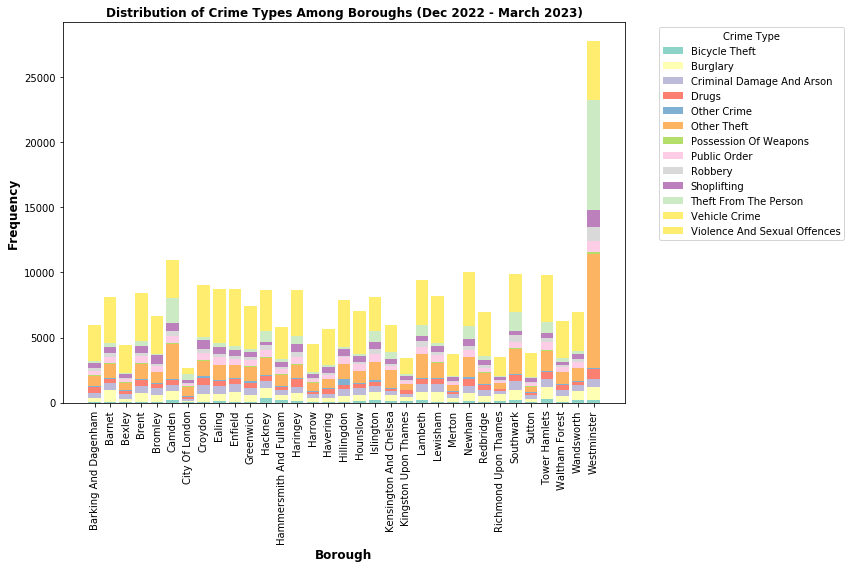

In [13]:
# Filter out the data for the desired months (December to March) excluding June
filtered_crime_data = filtered_crime_df[filtered_crime_df['month_name'] != 'June']

# Group the data by crime_type and matched_neighbourhood and calculate the count
filtered_crime_totals = filtered_crime_data.groupby(['crime_type', 'matched_neighbourhood']).size().unstack(fill_value=0)

# Set the figure size
plt.figure(figsize=(12, 8))

# Get the list of crime types
crime_types = filtered_crime_totals.index

# Get the number of bars (crime types)
num_bars = len(crime_types)

# Set the width of each bar
bar_width = 0.8

# Set the colors for each bar (crime type)
colors = plt.cm.Set3(range(num_bars))  # Using a different colormap for better colors

# Set the x-axis positions for the bars
x_positions = range(len(filtered_crime_totals.columns))

# Initialize the bottom position for each bar
bottom = [0] * len(filtered_crime_totals.columns)

# Iterate over each crime type
for i, crime_type in enumerate(crime_types):
    # Get the frequency data for the crime type
    frequency = filtered_crime_totals.loc[crime_type]

    # Plot the stacked bar chart
    plt.bar(x_positions, frequency, width=bar_width, bottom=bottom, label=crime_type, color=colors[i])

    # Update the bottom position for the next bar
    bottom = [b + f for b, f in zip(bottom, frequency)]

# Set the axis labels and title
plt.xlabel('Borough', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Crime Types Among Boroughs (Dec 2022 - March 2023)', fontsize=12, fontweight='bold')

# Set the x-axis tick positions and labels
plt.xticks(x_positions, [borough.replace('_', ' ').title() for borough in filtered_crime_totals.columns], rotation='vertical')

# Modify the legend labels to replace underscores with whitespace and capitalize
legend_labels = [label.replace('_', ' ').title() for label in crime_types]

# Add a legend with modified labels and title
plt.legend(title='Crime Type', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.savefig('data/img/crime_data_analysis_images/fig1.png')
plt.show()

#### 11. Create a stacked bar chart to show the total crime each month by Borough

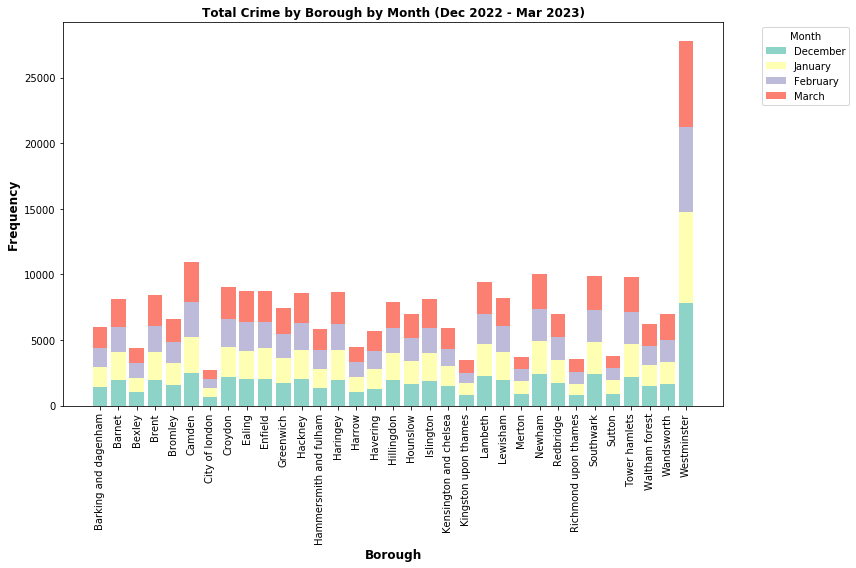

In [14]:
# Group the data by matched_neighbourhood and month and calculate the count
filtered_crime_totals = filtered_crime_data.groupby(['matched_neighbourhood', 'month']).size().unstack(fill_value=0)

# Get the unique boroughs
boroughs = filtered_crime_totals.index

# Set the colors for each month
colors = plt.cm.Set3(range(len(filtered_crime_totals.columns)))

# Set the figure size
plt.figure(figsize=(12, 8))

# Iterate over each month
for i, month in enumerate(filtered_crime_totals.columns):
    # Get the frequency data for the month
    frequency = filtered_crime_totals[month]

    # Plot the stacked bar chart
    plt.bar(boroughs, frequency, bottom=filtered_crime_totals.iloc[:, :i].sum(axis=1), color=colors[i], label=month)

# Set the axis labels and title
plt.xlabel('Borough', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Total Crime by Borough by Month (Dec 2022 - Mar 2023)', fontsize=12, fontweight='bold')

# Customize the legend labels
legend_labels = ['December', 'January', 'February', 'March']
plt.legend(title='Month', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate and format the x-axis labels
plt.xticks(rotation=90, ha='center')
plt.gca().set_xticklabels([label.replace('_', ' ').capitalize() for label in boroughs])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.savefig('data/img/crime_data_analysis_images/fig2.png')
plt.show()

#### 12. Create a table for mean and standard deviation for each crime type. Create boxplot to view the spread of the data from the mean.

In [15]:
# Group the data by matched_neighbourhood, month, and crime_type, and calculate the count
crime_grouped = filtered_crime_data.groupby(['matched_neighbourhood', 'month', 'crime_type']).size().reset_index(name='count')

# Calculate the mean and standard deviation of crime types across different months for each borough
mean_std_crime_data = crime_grouped.groupby(['matched_neighbourhood', 'crime_type']).agg({'count': ['mean', 'std']}).reset_index()

# Flatten the multi-level column names
mean_std_crime_data.columns = ['matched_neighbourhood', 'crime_type', 'mean', 'std']

# Pivot the mean_std_crime_data dataframe
pivot_table = mean_std_crime_data.pivot(index='matched_neighbourhood', columns='crime_type')

# Flatten the column names
pivot_table.columns = [f'{col[0]}_{col[1]}' for col in pivot_table.columns]

# Print the transposed table
print("Mean and Standard Deviation of Crime Types by Borough (Dec 2022 - March 2023):")
print(pivot_table)

Mean and Standard Deviation of Crime Types by Borough (Dec 2022 - March 2023):
                        mean_bicycle_theft  mean_burglary  \
matched_neighbourhood                                       
barking_and_dagenham                  9.00          85.50   
barnet                               16.25         220.25   
bexley                                4.50          63.75   
brent                                21.00         158.75   
bromley                               9.00         140.50   
camden                               59.50         163.50   
city_of_london                       12.50          26.25   
croydon                               6.25         155.25   
ealing                               23.50         148.50   
enfield                              11.00         186.25   
greenwich                            16.75         135.75   
hackney                              98.00         191.75   
hammersmith_and_fulham               44.25          99.25   
haring

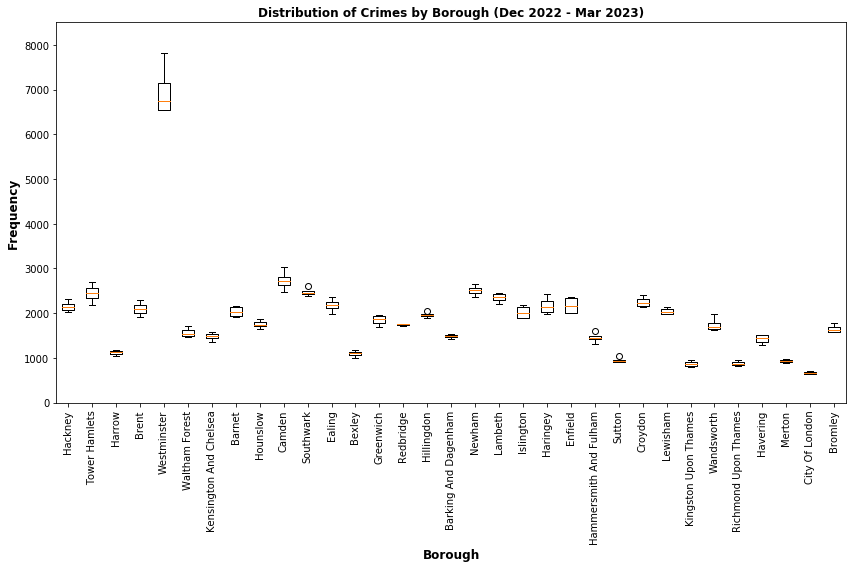

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a list to store the crime counts for each borough
borough_counts = []

# Iterate over each borough
for borough in filtered_crime_data['matched_neighbourhood'].unique():
    # Filter the data for the current borough
    borough_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'] == borough]
    
    # Get the crime counts for the current borough
    crime_counts = borough_data.groupby('month').size().values
    
    # Append the crime counts to the list
    borough_counts.append(crime_counts)
    
# Create the box plot
plt.boxplot(borough_counts, labels=filtered_crime_data['matched_neighbourhood'].unique())

# Set the y-axis limits
plt.ylim(0, 8500)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])

# Set the axis labels and title
plt.xlabel('Borough', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Distribution of Crimes by Borough (Dec 2022 - Mar 2023)', fontsize=12, fontweight='bold')

# Customize the x-axis labels
plt.xticks(rotation='vertical')
plt.gca().set_xticklabels([borough.replace('_', ' ').title() for borough in filtered_crime_data['matched_neighbourhood'].unique()])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.savefig('data/img/crime_data_analysis_images/fig3.png')
plt.show()

#### 13. Create a table for Frequency of Anti-social behaviour (ASB) each month by Borough and the time period Dec 2022 to March 2023. Create a stacked bar chart to display the information visually

In [17]:
# Filter out the data for the desired months (December to March) excluding June
filtered_data_asb = asb_df[(asb_df['month_name'] == 'December') | (asb_df['month_name'] == 'January') | (asb_df['month_name'] == 'February') | (asb_df['month_name'] == 'March')]

# Group the data by matched_neighbourhood and month_name and calculate the count
asb_totals = filtered_data_asb.groupby(['matched_neighbourhood', 'month_name']).size().unstack(fill_value=0)

# Calculate the sum of values from December to March
asb_totals['Total (Dec-Mar)'] = asb_totals.loc[:, 'December':'March'].sum(axis=1)

# Reorder the columns to display the months in the desired order
column_order = ['December', 'January', 'February', 'March', 'Total (Dec-Mar)']
asb_totals = asb_totals[column_order]

# Format the numbers with commas
asb_totals_formatted = asb_totals.applymap('{:,}'.format)

# Display the table of ASB frequency by borough and month
print("Anti-Social Behaviour Frequency by Borough and Month:")
print(asb_totals_formatted)

Anti-Social Behaviour Frequency by Borough and Month:
month_name             December January February March Total (Dec-Mar)
matched_neighbourhood                                                 
barking_and_dagenham        305     306      297   323           1,231
barnet                      521     594      569   599           2,283
bexley                      290     257      283   277           1,107
brent                       601     605      617   704           2,527
bromley                     314     363      346   427           1,450
camden                      612     664      672   776           2,724
city_of_london               61      54       81    41             237
croydon                     558     588      493   620           2,259
ealing                      602     701      641   787           2,731
enfield                     512     536      532   602           2,182
greenwich                   395     398      400   457           1,650
hackney                

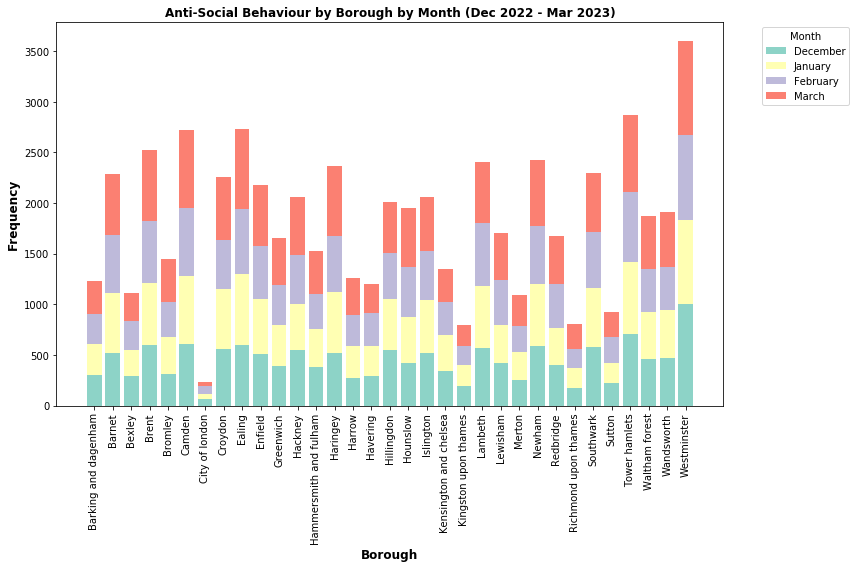

In [18]:
# Get the unique boroughs
boroughs = asb_totals.index

# Set the colors for each month
colors = plt.cm.Set3(range(len(asb_totals.columns) - 1))  # Subtract 1 to exclude the last column

# Set the figure size
plt.figure(figsize=(12, 8))

# Iterate over each month except the last column
for i, month in enumerate(asb_totals.columns[:-1]):  # Exclude the last column
    # Get the frequency data for the month
    frequency = asb_totals[month]

    # Plot the stacked bar chart
    plt.bar(boroughs, frequency, bottom=asb_totals.iloc[:, :i].sum(axis=1), color=colors[i], label=month)

# Set the axis labels and title
plt.xlabel('Borough', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Anti-Social Behaviour by Borough by Month (Dec 2022 - Mar 2023)', fontsize=12, fontweight='bold')

# Customize the legend labels
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate and format the x-axis labels
plt.xticks(rotation=90, ha='center')
plt.gca().set_xticklabels([label.replace('_', ' ').capitalize() for label in boroughs])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.savefig('data/img/crime_data_analysis_images/fig4.png')
plt.show()

#### 14. Calculate mean and standard deviation ASB report by month plot and display on boxplots

In [19]:
# Calculate mean and standard deviation for each month
monthly_mean = asb_totals.loc[:, 'December':'March'].mean()
monthly_std = asb_totals.loc[:, 'December':'March'].std()

# Calculate mean and standard deviation for the total period (December to March)
total_mean = monthly_mean.mean()
total_std = monthly_std.mean()

# Create a DataFrame to display the mean and standard deviation
mean_std_table = pd.DataFrame({'Mean': monthly_mean, 'Standard Deviation': monthly_std})

# Display the table of mean and standard deviation
print("Mean and Standard Deviation of ASB Frequency")
print("By Month:")
print(mean_std_table)

print("\nBy Total (Dec-March):")
print("Mean: ", total_mean)
print("Standard Deviation: ", total_std)

Mean and Standard Deviation of ASB Frequency
By Month:
                  Mean  Standard Deviation
month_name                                
December    443.424242          182.903668
January     450.666667          177.615925
February    442.515152          166.170681
March       497.636364          196.108997

By Total (Dec-March):
Mean:  458.560606060606
Standard Deviation:  180.69981757790998


In [20]:
# Create a DataFrame containing the data for each month and the total period
data_to_plot = asb_totals.loc[:, 'December':'March']

# Add a column for the total period (December to March)
data_to_plot['Total (Dec-March)'] = asb_totals['Total (Dec-March)']

# Reshape the data into a long format for boxplotting
data_to_plot = data_to_plot.melt(var_name='Month', value_name='Frequency')

# Set the order of the months for plotting
month_order = ['December', 'January', 'February', 'March', 'Total (Dec-March)']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Frequency', data=data_to_plot, order=month_order)

# Add labels and title
plt.xlabel('Month', fontweight='bold')
plt.ylabel('ASB Frequency', fontweight='bold')
plt.title('Distribution of ASB Frequency by Month', fontsize=12, fontweight='bold')

# Display the plot
plt.savefig('data/img/crime_data_analysis_images/fig5.png')
plt.show()

KeyError: 'Total (Dec-March)'

#### 15. Determine the Top 5 London Boroughs for the highest and lowest crime

In [ ]:
# Recreate the crime_totals_table based on the filtered data
crime_totals_table = filtered_crime_data.groupby('matched_neighbourhood')[['crime_id']].count().reset_index()
crime_totals_table.columns = ['Borough', 'Total Crimes']

# Sort the DataFrame by the total crimes in descending order
crime_totals_table = crime_totals_table.sort_values('Total Crimes', ascending=False)

# Format the total crimes column with commas
crime_totals_table['Total Crimes'] = crime_totals_table['Total Crimes'].apply(lambda x: f'{x:,}')

# Print top 5 boroughs based on totals
print("Top 5 Boroughs with highest crime (Totals):\n")
top_5_crime_totals = crime_totals_table.head(5)
print(top_5_crime_totals)

# Print bottom 5 boroughs based on totals
print("\nTop 5 Boroughs with lowest crime (Totals):\n")
bottom_5_crime_totals = crime_totals_table.tail(5)
print(bottom_5_crime_totals)


#### 16. Create a heatmap to display the crime type distribution by the Top 5 boroughs with highest and lowest crime. Display the proportions on pie charts

In [ ]:
# Select the top 5 and bottom 5 boroughs based on the total crimes in Dec - March
top_5_boroughs = crime_totals_table.head(5)['Borough']
bottom_5_boroughs = crime_totals_table.tail(5)['Borough']

# Filter the data for the top 5 and bottom 5 boroughs
filtered_heatmap_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'].isin(top_5_boroughs) |
                               filtered_crime_data['matched_neighbourhood'].isin(bottom_5_boroughs)]

# Group the filtered data by crime_type and matched_neighbourhood, and calculate the count
crime_type_totals = filtered_heatmap_data.groupby(['crime_type', 'matched_neighbourhood']).size().unstack(fill_value=0)

# Capitalize the labels and replace underscores with whitespaces
crime_type_totals.columns = crime_type_totals.columns.str.capitalize().str.replace('_', ' ')
crime_type_totals.index = crime_type_totals.index.str.capitalize().str.replace('_', ' ')

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(crime_type_totals, cmap='YlOrRd', annot=True, fmt=",")
plt.title("Crime Types for Top 5 Boroughs with the Highest and Lowest Crime (Dec 2022 - March 2023)", fontweight='bold')
plt.xlabel("Boroughs", fontweight='bold')
plt.ylabel("Crime Types", fontweight='bold')
plt.show()

In [ ]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Filter the crime data for the top 5 boroughs
top_5_boroughs_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'].isin(top_5_boroughs)]

# Calculate the crime count for each crime type in the top boroughs
crime_type_counts_top = top_5_boroughs_data['crime_type'].value_counts()

# Calculate the percentage of each crime type
crime_type_percentages_top = (crime_type_counts_top / crime_type_counts_top.sum()) * 100

# Filter crime types with percentage >= 3%
filtered_crime_types_top = crime_type_percentages_top[crime_type_percentages_top >= 3]

# Create labels for crime types with percentage >= 3%
labels_top = [f'{crime_type.replace("_", " ").title()}\n{crime_type_percentages_top[crime_type]:.1f}%' for crime_type in filtered_crime_types_top.index]

# Plot the pie chart for the top boroughs
axes[0].pie(filtered_crime_types_top, labels=labels_top, startangle=90, autopct='', pctdistance=0.8, wedgeprops={'edgecolor': 'white'})
axes[0].set_title('Crime Types Distribution for Top 5 Boroughs with highest crime', fontsize=12, fontweight='bold', pad=20)  # Increase the pad value to add more space between the title and the subplot
axes[0].axis('equal')

# Filter the crime data for the bottom 5 boroughs
bottom_5_boroughs_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'].isin(bottom_5_boroughs)]

# Calculate the crime count for each crime type in the bottom boroughs
crime_type_counts_bottom = bottom_5_boroughs_data['crime_type'].value_counts()

# Calculate the percentage of each crime type
crime_type_percentages_bottom = (crime_type_counts_bottom / crime_type_counts_bottom.sum()) * 100

# Filter crime types with percentage >= 3%
filtered_crime_types_bottom = crime_type_percentages_bottom[crime_type_percentages_bottom >= 3]

# Create labels for crime types with percentage >= 3%
labels_bottom = [f'{crime_type.replace("_", " ").title()}\n{crime_type_percentages_bottom[crime_type]:.1f}%' for crime_type in filtered_crime_types_bottom.index]

# Plot the pie chart for the bottom boroughs
axes[1].pie(filtered_crime_types_bottom, labels=labels_bottom, startangle=90, autopct='', pctdistance=0.8, wedgeprops={'edgecolor': 'white'})
axes[1].set_title('Crime Types Distribution for Top 5 Boroughs with lowest crime', fontsize=12, fontweight='bold', pad=20)  # Increase the pad value to add more space between the title and the subplot
axes[1].axis('equal')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4)
plt.savefig('data/img/crime_data_analysis_images/fig7.png')
plt.show()

#### 17. Investigate last outcome category distribution by crime type and by boroughs. Classify last outcome as solved, unsolved and pending. Display the percentage of most solved and unsolved by borough.

In [ ]:
# Group the data by crime_type and last_outcome_category, and calculate the count
grouped_data = filtered_crime_data.groupby(['crime_type', 'last_outcome_category']).size().unstack()

# Replace NaN values with 0
grouped_data = grouped_data.fillna(0)

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(grouped_data, cmap='Blues', annot=True, fmt='g', ax=ax)

# Set the labels and title
ax.set_xlabel('Last Outcome Category', fontsize=12, fontweight='bold')
ax.set_ylabel('Crime Type', fontsize=12, fontweight='bold')
ax.set_title('Crime Type vs. Last Outcome Category', fontsize=16, fontweight='bold')

# Replace underscores with whitespace and capitalize x-axis labels
x_labels = [label.replace('_', ' ').replace(';', '').title() for label in grouped_data.columns]
ax.set_xticklabels(x_labels)

# Replace underscores with whitespace and capitalize y-axis labels
y_labels = [label.replace('_', ' ').replace(';', '').title() for label in grouped_data.index]
ax.set_yticklabels(y_labels)

# Adjust the layout
plt.tight_layout()

# Display the heatmap
plt.savefig('data/img/crime_data_analysis_images/fig8.png')
plt.show()

In [ ]:
# Map the values in "last_outcome_category" column to the new column
outcome_mapping = {
    'under_investigation': 'pending',
    'local_resolution': 'solved',
    'investigation_complete;_no_suspect_identified': 'unsolved',
    'awaiting_court_outcome': 'solved',
    'offender_given_penalty_notice': 'solved',
    'offender_given_a_caution': 'solved',
    'offender_given_a_drugs_possession_warning': 'solved'
}

filtered_crime_data['Outcome'] = filtered_crime_data['last_outcome_category'].map(outcome_mapping)

# Group by borough and outcome, and calculate the count
grouped_data = filtered_crime_data.groupby(['matched_neighbourhood', 'Outcome']).size().unstack()

# Define the order of categories
category_order = ['solved', 'unsolved', 'pending']

# Plot the bar chart
fig, ax = plt.subplots(figsize=(18, 16))
grouped_data[category_order].plot(kind='bar', ax=ax, width=0.8)

# Set the labels and title
ax.set_xlabel('Borough', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax.set_title('Crime Outcome by Borough (Dec 2022 - Mar 2023)', fontsize=16, fontweight='bold')

# Add a legend
ax.legend(title='Outcome')

# Format the axis labels
ax.set_xticklabels([label.replace('_', ' ').capitalize().replace(';', '') for label in grouped_data.index], rotation=90)

# Show the plot
plt.savefig('data/img/crime_data_analysis_images/fig9.png')
plt.show()

In [ ]:
# Calculate the count of solved and unsolved outcomes for each borough
grouped_data['Solved'] = grouped_data['solved'].fillna(0)
grouped_data['Unsolved'] = grouped_data['unsolved'].fillna(0)

# Calculate the total outcomes for each borough
grouped_data['Total'] = grouped_data['Solved'] + grouped_data['Unsolved']

# Calculate the percentage of solved outcomes
grouped_data['Solved %'] = (grouped_data['Solved'] / grouped_data['Total']) * 100

# Calculate the percentage of unsolved outcomes
grouped_data['Unsolved %'] = (grouped_data['Unsolved'] / grouped_data['Total']) * 100

# Get the top 5 boroughs with the highest percentage of solved outcomes
top_5_solved_boroughs = grouped_data.nlargest(5, 'Solved %')[['Solved %']]

# Get the top 5 boroughs with the lowest percentage of solved outcomes
bottom_5_solved_boroughs = grouped_data.nsmallest(5, 'Solved %')[['Solved %']]

# Get the top 5 boroughs with the highest percentage of unsolved outcomes
top_5_unsolved_boroughs = grouped_data.nlargest(5, 'Unsolved %')[['Unsolved %']]

# Get the top 5 boroughs with the lowest percentage of unsolved outcomes
bottom_5_unsolved_boroughs = grouped_data.nsmallest(5, 'Unsolved %')[['Unsolved %']]

# Print the tables
print("Top 5 Boroughs with Highest Percentage of Solved Outcomes:")
print(top_5_solved_boroughs.applymap('{:,.2f}%'.format))

print("\nTop 5 Boroughs with Lowest Percentage of Solved Outcomes:")
print(bottom_5_solved_boroughs.applymap('{:,.2f}%'.format))

print("\nTop 5 Boroughs with Highest Percentage of Unsolved Outcomes:")
print(top_5_unsolved_boroughs.applymap('{:,.2f}%'.format))

print("\nTop 5 Boroughs with Lowest Percentage of Unsolved Outcomes:")
print(bottom_5_unsolved_boroughs.applymap('{:,.2f}%'.format))


#### 18. Look at percentage change between the months for total crime and crime type

In [ ]:
# Filter the data for the top 5 and bottom 5 boroughs
top_5_boroughs_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'].isin(top_5_boroughs)]
bottom_5_boroughs_data = filtered_crime_data[filtered_crime_data['matched_neighbourhood'].isin(bottom_5_boroughs)]

# Calculate the total count for each month and borough for the top 5 boroughs
top_5_boroughs_month_totals = top_5_boroughs_data.pivot_table(index='month', columns='matched_neighbourhood', aggfunc='size', fill_value=0)

# Calculate the total count for each month and borough for the bottom 5 boroughs
bottom_5_boroughs_month_totals = bottom_5_boroughs_data.pivot_table(index='month', columns='matched_neighbourhood', aggfunc='size', fill_value=0)

# Calculate the percentage change for each month and borough for the top 5 boroughs
percentage_change_top = top_5_boroughs_month_totals.pct_change() * 100

# Calculate the percentage change for each month and borough for the bottom 5 boroughs
percentage_change_bottom = bottom_5_boroughs_month_totals.pct_change() * 100

# Plot the percentage change for the top 5 boroughs as a time series
plt.figure(figsize=(12, 6))
for borough in top_5_boroughs:
    plt.plot(percentage_change_top.index, percentage_change_top[borough], marker='o', label=borough.replace('_', ' ').capitalize())
plt.title('Percentage Change in Total Crime Count for Top 5 Boroughs with Highest Crime (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig10a.png')
plt.show()

# Plot the percentage change for the bottom 5 boroughs as a time series
plt.figure(figsize=(12, 6))
for borough in bottom_5_boroughs:
    plt.plot(percentage_change_bottom.index, percentage_change_bottom[borough], marker='o', label=borough.replace('_', ' ').capitalize())
plt.title('Percentage Change in Total Crime Count for Top 5 Boroughs with Lowest Crime (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig10b.png')
plt.show()

In [ ]:
# Group the data by crime type and calculate the sum of counts
crime_type_counts = filtered_crime_data.groupby('crime_type')['matched_neighbourhood'].sum()

# Sort the crime types in descending order based on their total counts
sorted_crime_types = crime_type_counts.sort_values(ascending=False)

# Select the top 5 crime types
top_5_crime_types = sorted_crime_types.head(5).index.tolist()

# Select the bottom 5 crime types
bottom_5_crime_types = sorted_crime_types.tail(5).index.tolist()

# Filter the data for the top 5 and bottom 5 crime types
top_5_crime_data = filtered_crime_data[filtered_crime_data['crime_type'].isin(top_5_crime_types)]
bottom_5_crime_data = filtered_crime_data[filtered_crime_data['crime_type'].isin(bottom_5_crime_types)]

# Filter the data for the top 5 and bottom 5 crime types
top_5_crime_data = filtered_crime_data[filtered_crime_data['crime_type'].isin(top_5_crime_types)]
bottom_5_crime_data = filtered_crime_data[filtered_crime_data['crime_type'].isin(bottom_5_crime_types)]

# Calculate the total count for each month and crime type for the top 5 crime types
top_5_crime_month_totals_bytype = top_5_crime_data.pivot_table(index='month', columns='crime_type', aggfunc='size', fill_value=0)

# Calculate the total count for each month and crime type for the bottom 5 crime types
bottom_5_crime_month_totals_bytype = bottom_5_crime_data.pivot_table(index='month', columns='crime_type', aggfunc='size', fill_value=0)

# Calculate the percentage change for each month and crime type for the top 5 crime types
percentage_change_top_bytype = top_5_crime_month_totals_bytype.pct_change() * 100

# Calculate the percentage change for each month and crime type for the bottom 5 crime types
percentage_change_bottom_bytype = bottom_5_crime_month_totals_bytype.pct_change() * 100

# Plot the percentage change for the top 5 crime types as a time series
plt.figure(figsize=(12, 6))
for crime_type in top_5_crime_types:
    plt.plot(percentage_change_top_bytype.index, percentage_change_top_bytype[crime_type], marker='o', label=crime_type.replace('_', ' ').capitalize())
plt.title('Percentage Change in Total Crime Frequency for Highest 5 Crime Types (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])  # Set custom x-axis labels
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig11a.png')
plt.show()

# Plot the percentage change for the bottom 5 crime types as a time series
plt.figure(figsize=(12, 6))
for crime_type in bottom_5_crime_types:
    plt.plot(percentage_change_bottom_bytype.index, percentage_change_bottom_bytype[crime_type], marker='o', label=crime_type.replace('_', ' ').capitalize())
plt.title('Percentage Change in Total Crime Frequency for Lowest 5 Crime Types (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])  # Set custom x-axis labels
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig11b.png')
plt.show()

#### 19. Create a table displaying top 5 boroughs with highest and lowest ASB. Show the percentage change of incidences per month.

In [ ]:
# Calculate the total ASB incidents by borough
total_asb_by_borough = filtered_data_asb.groupby('matched_neighbourhood').size().reset_index(name='total_asb')

# Sort the DataFrame by total ASB incidents in descending order
sorted_asb_df = total_asb_by_borough.sort_values('total_asb', ascending=False)

# Get the top 5 boroughs with the highest ASB incidents by count
top_5_highest_asb_count = sorted_asb_df.head(5)

# Get the top 5 boroughs with the lowest ASB incidents by count
bottom_5_lowest_asb_count = sorted_asb_df.tail(5)

# Print the top 5 boroughs with highest ASB incidents by count
print("Top 5 Boroughs with Highest ASB Incidents (by count):")
print(top_5_highest_asb_count)

# Print the top 5 boroughs with lowest ASB incidents by count
print("\nTop 5 Boroughs with Lowest ASB Incidents (by count):")
print(bottom_5_lowest_asb_count)

In [ ]:
# Calculate the total ASB incidents for each month and borough
asb_month_totals = filtered_data_asb.pivot_table(index='month', columns='matched_neighbourhood', aggfunc='size', fill_value=0)

# Calculate the percentage change for each month and borough
percentage_change = asb_month_totals.pct_change() * 100

# Select the top 5 and bottom 5 boroughs
top_5_boroughs = sorted_asb_df.head(5)['matched_neighbourhood']
bottom_5_boroughs = sorted_asb_df.tail(5)['matched_neighbourhood']

# Filter the data for the top 5 and bottom 5 boroughs
top_5_borough_data = percentage_change[top_5_boroughs]
bottom_5_borough_data = percentage_change[bottom_5_boroughs]

# Plot the percentage change for the top 5 boroughs as a time series
plt.figure(figsize=(12, 6))
for borough in top_5_borough_data:
    plt.plot(top_5_borough_data.index, top_5_borough_data[borough], marker='o', label=borough.replace('_', ' ').capitalize())
plt.title('Percentage Change in ASB Incidents for Top 5 Boroughs (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])  # Set custom x-axis labels
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig12a.png')
plt.show()

# Plot the percentage change for the bottom 5 boroughs as a time series
plt.figure(figsize=(12, 6))
for borough in bottom_5_borough_data:
    plt.plot(bottom_5_borough_data.index, bottom_5_borough_data[borough], marker='o', label=borough.replace('_', ' ').capitalize())
plt.title('Percentage Change in ASB Incidents for Bottom 5 Boroughs (December 2022 to March 2023)', fontsize=12, fontweight='bold')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Percentage Change %', fontweight='bold')
plt.xticks(['2023-01', '2023-02', '2023-03'], ['Jan 2023', 'Feb 2023', 'March 2023'])  # Set custom x-axis labels
plt.legend()
plt.grid(True)
plt.savefig('data/img/crime_data_analysis_images/fig12b.png')
plt.show()


#### 20. Average Property Price for each London Borough in 2022. Create scatter plots to see if there is any trend for total crime or ASB

In [ ]:
# Read the CSV file into a DataFrame
avg_property_price = pd.read_csv('C:\\Users\\Trudy\\Desktop\\london_borough_property_prices.csv')

# Remove capitalization and replace whitespace with underscores in column names
avg_property_price.columns = avg_property_price.columns.str.lower().str.replace(' ', '_')

# Remove capitalization and replace whitespace with underscores in all data columns
avg_property_price = avg_property_price.apply(lambda x: x.str.lower().str.replace(' ', '_') if x.dtype == 'object' else x)

# Remove the pound symbol (£) and commas from the price column and convert it to numeric
avg_property_price['average_price_2022'] = avg_property_price['average_price_2022'].str.replace('£', '').str.replace(',', '').astype(float)

# Remove the trailing underscore in the "borough" column
avg_property_price['borough'] = avg_property_price['borough'].str.rstrip('_')

# Print the updated DataFrame
print(avg_property_price)


In [ ]:
# Sort the DataFrame by average_price_2022 in descending order and get the top 5 boroughs with highest property prices
top_5_high_prices = avg_property_price.nlargest(5, 'average_price_2022')

# Sort the DataFrame by average_price_2022 in ascending order and get the top 5 boroughs with lowest property prices
top_5_low_prices = avg_property_price.nsmallest(5, 'average_price_2022')

# Display the top 5 boroughs with highest property prices
print("Top 5 Boroughs with Highest Property Prices:")
print(top_5_high_prices)

# Display the top 5 boroughs with lowest property prices
print("\nTop 5 Boroughs with Lowest Property Prices:")
print(top_5_low_prices)


In [ ]:
# Group the filtered DataFrame by matched_neighbourhood and calculate the total crime count
borough_total_crime = filtered_crime_data.groupby('matched_neighbourhood').size().reset_index(name='total_crime')

# Merge the borough_total_crime DataFrame with the avg_property_price DataFrame on the "matched_neighbourhood" column
merged_df = pd.merge(borough_total_crime, avg_property_price, left_on='matched_neighbourhood', right_on='borough', how='inner')

# Display the merged DataFrame
print(merged_df)

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_df['total_crime'], merged_df['average_price_2022'], c=merged_df.index, cmap='tab20')

# Add labels and title
plt.xlabel('Total Crime (Dec 2022 - Mar 2023)', fontweight='bold')
plt.ylabel('Average Property Price 2022 (£)', fontweight='bold')
plt.title('Total Crime (Dec 2023 - Mar 2023) vs. Average Property Price 2022', fontweight='bold')

# Create custom legend handles and labels
boroughs = merged_df['borough'].unique()
labels = [borough.replace('_', ' ').capitalize() for borough in boroughs]
handles = [plt.Line2D([], [], marker='o', color=scatter.cmap(scatter.norm(borough_index)), markersize=8, label=label) for borough_index, label in enumerate(labels)]

# Add legend on the right with colorbar
legend = plt.legend(handles=handles, title='Borough', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('data/img/crime_data_analysis_images/fig13.png')
plt.show()

In [ ]:
# Group the filtered DataFrame by matched_neighbourhood and calculate the total ASB incidents
borough_total_asb = filtered_data_asb.groupby('matched_neighbourhood').size().reset_index(name='total_asb')

# Merge the borough_total_asb DataFrame with the avg_property_price DataFrame on the "matched_neighbourhood" column
merged_asb_df = pd.merge(borough_total_asb, avg_property_price, left_on='matched_neighbourhood', right_on='borough', how='inner')

# Display the merged DataFrame
print(merged_asb_df)


In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(merged_asb_df['total_asb'], merged_asb_df['average_price_2022'], c=merged_asb_df.index, cmap='tab20')

# Add labels and title
plt.xlabel('Total ASB Incidents (Dec 2022 - Mar 2023)', fontweight='bold')
plt.ylabel('Average Property Price 2022 (£)', fontweight='bold')
plt.title('Total ASB Incidents (Dec 2023 - Mar 2023) vs. Average Property Price 2022', fontweight='bold')

# Create custom legend handles and labels
boroughs = merged_asb_df['matched_neighbourhood'].unique()
labels = [borough.replace('_', ' ').capitalize() for borough in boroughs]
handles = [plt.Line2D([], [], marker='o', color=scatter.cmap(scatter.norm(borough_index)), markersize=8, label=label) for borough_index, label in enumerate(labels)]

# Add legend on the right with colorbar
legend = plt.legend(handles=handles, title='Borough', bbox_to_anchor=(1.02, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.savefig('data/img/crime_data_analysis_images/fig14.png')
plt.show()


## Main Findings

##### General Trends
1. ASB and crime has increased between December 2022 - March 2023.
2. Westminster seems to have the greatest amount of crime compared to other boroughs, while city of London has the least.
3. The distribution of crime across the boroughs for the time period looks even, Westminster shows a positive skew.
4. ABS also shows the greatest amount in Westminster and least in City of London.
5. Distribution of ASB by month shows negative skew for March, which impacts Dec-March as that also shows a negative skew.

##### Top 5 boroughs with highest and lowest crime
6. Top 5 boroughs with highest crime: westminster, camden, newham, southwark and tower_hamlets.
7. Top 5 boroughs with lowest crime: sutton, merton, richmond upon thames, kingston upon thames and city of London.
8. Other theft, theft from a person and violence and sexual offences are the top 3 crime type in Westminster.
9. Posession of a weapon, other crime and bicycle theft are the bottom 3 crime type in Westminster.
10. Top 3 crime types for the boroughs with the highest crime was Other theft, violence and sexual offences and theft from a person.
11. Top 3 crime types for boroughs with the lowest crime was violence and sexual offences, other theft and vehicle crime.

##### Outcomes of crime cases
12. Investigation complete with no suspect identified and under investigation most common outcomes.
13. Most cases across the boroughs are unsolved or pending.
14. Barking and dagenham, city of London, newham, kingston upon thames and havering have highest percentage of solved cases. While westminster, kenington and chelsea, richmond upon thames, camden and wandsworth have lowest percentage of solved cases.
15. Westminster, kensington and chelsea, richmond upon thames, camden and wandsworth have highest percentage of unsolved cases. Barking and dagenham, city of london, newham, kingston upon thames and havering have lowest percentage of unsolved cases.

##### Percentage change of crime over December 2022 - March 2023
16. For the top 5 boroughs with highest crime rate, the percentage change of crime by month drops in February and then increases, however for Westminster it continues to rise.
17. For the top 5 boroughs with lowest crime, the percentage change follows the pattern seen in the highest crime group, except for city of London that shows the inverse trend.
18. The percentage change for violence and sexual offenses, vehicle crime and burglary there is a decrease in February and then increase in March. This is not seen for theft from a person which shows the inverse. Other theft shows a steady increase.
19. Drugs, posession of a weapon and other crime showed a decrease in february with an increase in march. Robbery and bicycle theft showed a steady decrease.

##### Anti-social behaviour (ASB) trends
22. Top 5 boroughs with highest ASB: westminster, tower hamlets, ealing, camden and brent. Top 5 boroughs with lowest asb are merton, sutton, richmond upon thames, kingston upon thames and city of london.
23. All boroughs in top 5 highest ASB, show decrease and then increase. While westminster shows a steady increase. For top 5 with lowest ASB incidences, richmond, merton and kingston show a decrease and then increase. While city of london and sutton show the inverse

##### Average property price per borough vs. crime and ASB
24. Kensington and chelsea, city of westminster, camden, richmond upon thames and hammersmith and fulham have the highest average property price. Barking and dagenham, bexley, newham, croydon and havering have the lowest average property price.
25. A positive correlation is observed with the average property price in a borough and total crime and ASB.

### Please view the combined crime + Airbnb data analysis notebook next :)